In [14]:
import sys
sys.path.append('..')

import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import yfinance as yf


from src.data_loader import load_stock_data

plt.style.use('default')
%matplotlib inline

In [15]:
ticker = yf.Ticker("AAPL")
df = ticker.history(period="5y")

print(f"Dataset shape: {df.shape}")
print(f"Date range: {df.index.min().strftime('%Y-%m-%d')} to {df.index.max().strftime('%Y-%m-%d')}")
print(f"Trading days: {len(df)}")

print("\nFirst 5 records:")
df.head()

Dataset shape: (1256, 7)
Date range: 2020-07-06 to 2025-07-03
Trading days: 1256

First 5 records:


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-07-06 00:00:00-04:00,89.916395,91.321034,89.884801,90.852013,118655600,0.0,0.0
2020-07-07 00:00:00-04:00,91.231114,92.011197,90.458321,90.570107,112424400,0.0,0.0
2020-07-08 00:00:00-04:00,91.549468,92.711090,91.461978,92.679497,117092000,0.0,0.0
2020-07-09 00:00:00-04:00,93.573806,93.627270,92.028220,93.078056,125642800,0.0,0.0
2020-07-10 00:00:00-04:00,92.672208,93.299197,92.059807,93.240868,90257200,0.0,0.0


In [16]:


print("Data structure:")
print(f"   Index type: {type(df.index).__name__}")
print(f"   Columns: {list(df.columns)}")
print(f"   Data types:")
for col in df.columns:
    print(f"     - {col}: {df[col].dtype}")

print(f"\nMemory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

print(f"\nMissing values check:")
missing_values = df.isnull().sum()
if missing_values.sum() == 0:
    print("   No missing values!")
else:
    print("   Missing values found:")
    for col, missing in missing_values.items():
        if missing > 0:
            print(f"     - {col}: {missing} ({missing/len(df)*100:.1f}%)")

print(f"\nDescriptive statistics:")
print(df.describe().round(2))

Data structure:
   Index type: DatetimeIndex
   Columns: ['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits']
   Data types:
     - Open: float64
     - High: float64
     - Low: float64
     - Close: float64
     - Volume: int64
     - Dividends: float64
     - Stock Splits: float64

Memory usage: 0.08 MB

Missing values check:
   No missing values!

Descriptive statistics:
          Open     High      Low    Close       Volume  Dividends  \
count  1256.00  1256.00  1256.00  1256.00       1256.0    1256.00   
mean    166.15   168.01   164.42   166.30   79164725.8       0.00   
std      36.97    37.23    36.78    37.06   40604316.4       0.03   
min      88.45    90.37    86.66    90.03   23234700.0       0.00   
25%     139.30   141.01   137.02   139.35   51886450.0       0.00   
50%     164.09   165.97   162.55   163.73   69468300.0       0.00   
75%     189.67   191.40   188.40   190.02   93405700.0       0.00   
max     257.57   259.47   257.01   258.40  37433680

In [17]:
print(" Аналіз цінових характеристик:")

print(f"Структура колонок: {df.columns}")
print(f"Тип колонок: {type(df.columns)}")

if hasattr(df.columns, 'levels'):
    df_clean = df.copy()
    df_clean.columns = [col[0] if isinstance(col, tuple) else col for col in df.columns]
    df = df_clean
    print(" Колонки спрощено з MultiIndex")

print(f"Нові колонки: {list(df.columns)}")

high_max = df['High'].max()
low_min = df['Low'].min()
price_range = high_max - low_min

print(f"   • Максимальна ціна (High): ${high_max:.2f}")
print(f"   • Мінімальна ціна (Low): ${low_min:.2f}")
print(f"   • Ціновий діапазон: ${price_range:.2f}")

daily_returns = df['Close'].pct_change()
daily_volatility = daily_returns.std()
annual_volatility = daily_volatility * np.sqrt(252)

print(f"\n Волатільність:")
print(f"   • Денна волатільність: {daily_volatility:.4f} ({daily_volatility*100:.2f}%)")
print(f"   • Річна волатільність: {annual_volatility:.4f} ({annual_volatility*100:.2f}%)")

volume_mean = df['Volume'].mean()
volume_median = df['Volume'].median()
volume_max = df['Volume'].max()
volume_min = df['Volume'].min()

print(f"\n Аналіз обсягів торгів:")
print(f"   • Середній денний обсяг: {volume_mean:,.0f}")
print(f"   • Медіанний обсяг: {volume_median:,.0f}")
print(f"   • Максимальний обсяг: {volume_max:,.0f}")
print(f"   • Мінімальний обсяг: {volume_min:,.0f}")

close_first = df['Close'].iloc[0]
close_last = df['Close'].iloc[-1]
total_return = (close_last / close_first - 1) * 100

print(f"\n Загальна прибутковість за період: {total_return:.2f}%")
print(f"\n Базовий огляд даних завершено!")

 Аналіз цінових характеристик:
Структура колонок: Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits'], dtype='object')
Тип колонок: <class 'pandas.core.indexes.base.Index'>
Нові колонки: ['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits']
   • Максимальна ціна (High): $259.47
   • Мінімальна ціна (Low): $86.66
   • Ціновий діапазон: $172.82

 Волатільність:
   • Денна волатільність: 0.0188 (1.88%)
   • Річна волатільність: 0.2985 (29.85%)

 Аналіз обсягів торгів:
   • Середній денний обсяг: 79,164,726
   • Медіанний обсяг: 69,468,300
   • Максимальний обсяг: 374,336,800
   • Мінімальний обсяг: 23,234,700

 Загальна прибутковість за період: 135.05%

 Базовий огляд даних завершено!


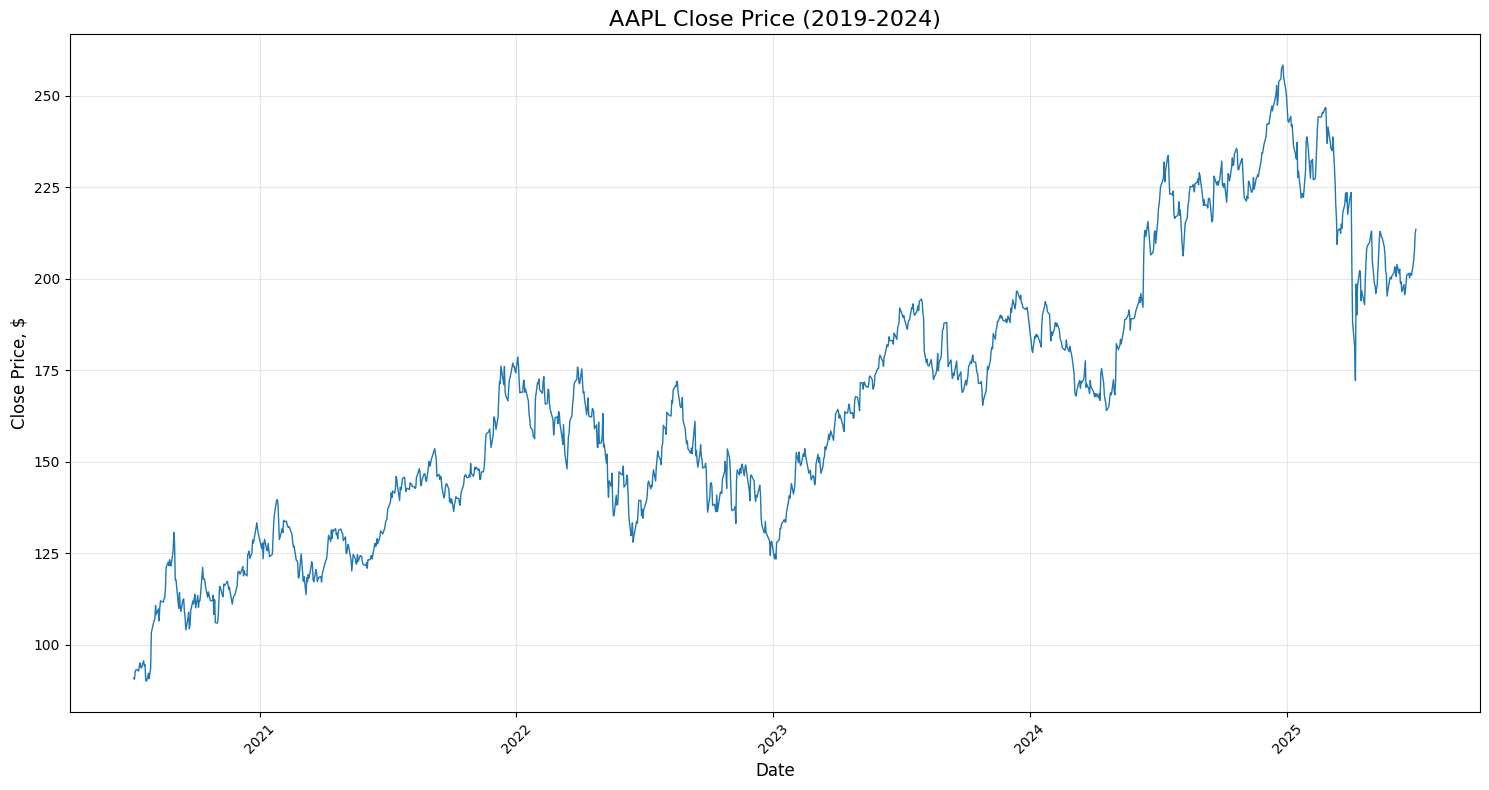

In [18]:
plt.figure(figsize=(15, 8))
plt.plot(df.index, df['Close'], linewidth=1)
plt.title('AAPL Close Price (2019-2024)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Close Price, $', fontsize=12)
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

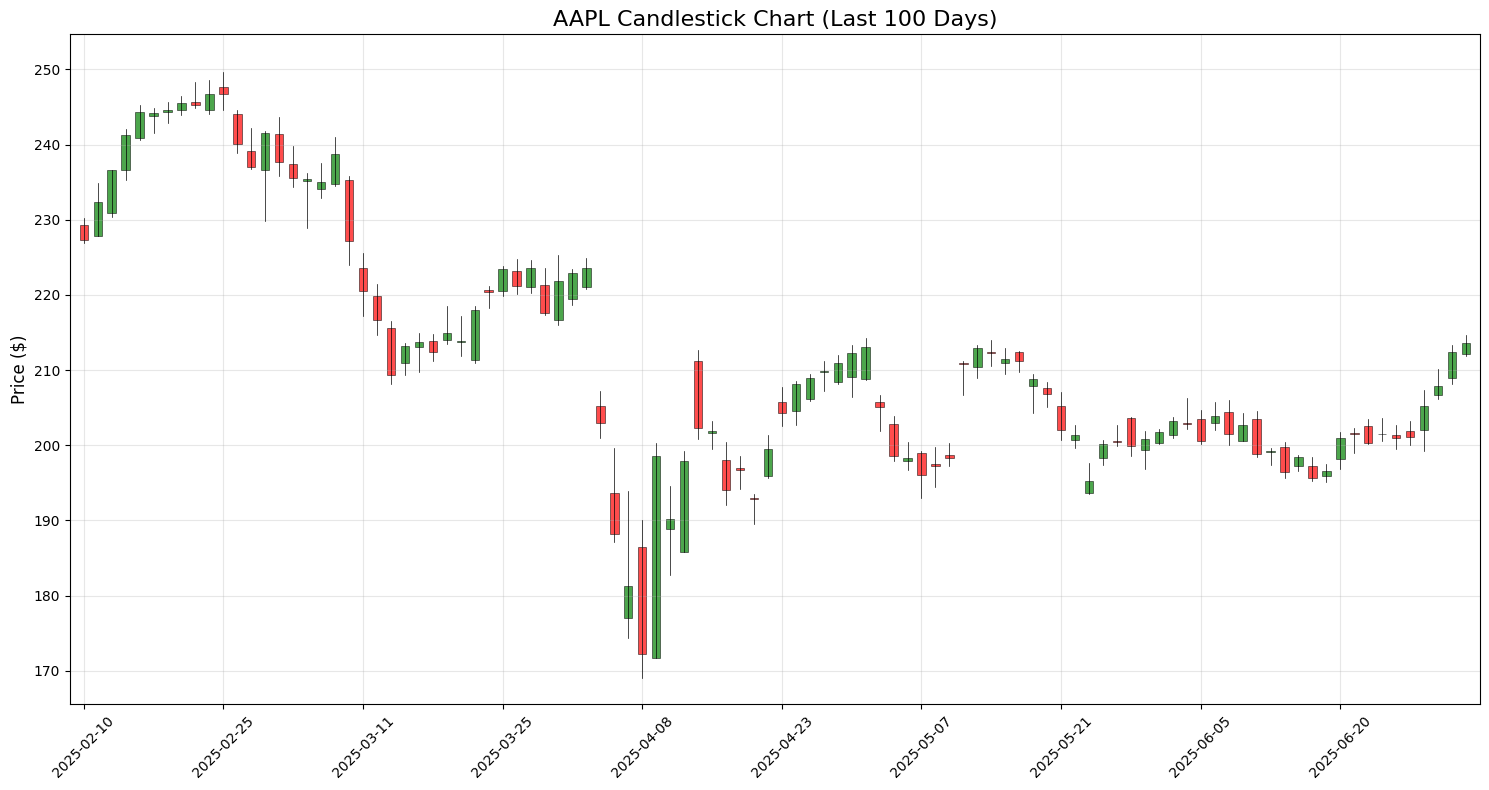

In [19]:
from matplotlib.patches import Rectangle

def plot_candlestick_matplotlib(df, title="Stock Price", n_days=100):
    """Створює candlestick chart з matplotlib"""
    df_plot = df.tail(n_days).copy()

    fig, ax = plt.subplots(figsize=(15, 8))

    for i, (date, row) in enumerate(df_plot.iterrows()):
        color = 'green' if row['Close'] >= row['Open'] else 'red'

        height = abs(row['Close'] - row['Open'])
        bottom = min(row['Open'], row['Close'])

        rect = Rectangle((i-0.3, bottom), 0.6, height,
                        facecolor=color, alpha=0.7, edgecolor='black', linewidth=0.5)
        ax.add_patch(rect)

        ax.plot([i, i], [row['Low'], row['High']], color='black', linewidth=0.5)

    ax.set_xlim(-1, len(df_plot))
    ax.set_ylim(df_plot[['Low', 'High']].min().min() * 0.98,
                df_plot[['Low', 'High']].max().max() * 1.02)

    step = max(1, len(df_plot) // 10)
    ax.set_xticks(range(0, len(df_plot), step))
    ax.set_xticklabels([df_plot.index[i].strftime('%Y-%m-%d') for i in range(0, len(df_plot), step)],
                       rotation=45)

    ax.set_title(title, fontsize=16)
    ax.set_ylabel('Price ($)', fontsize=12)
    ax.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

plot_candlestick_matplotlib(df, "AAPL Candlestick Chart (Last 100 Days)")

In [20]:
from src.feature_engineering import add_technical_indicators

df_with_indicators = add_technical_indicators(df)
print(f"Dataset shape after adding indicators: {df_with_indicators.shape}")
print(f"Columns: {list(df_with_indicators.columns)}")

df_with_indicators.tail()

Dataset shape after adding indicators: (1256, 139)
Columns: ['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits', 'SMA_5', 'SMA_10', 'SMA_20', 'SMA_50', 'SMA_100', 'SMA_200', 'EMA_10', 'EMA_20', 'EMA_50', 'SMA_20_50_Cross', 'RSI_14', 'RSI_21', 'Stoch_K', 'Stoch_D', 'Williams_R', 'ROC_5', 'ROC_10', 'ROC_20', 'Momentum_5', 'Momentum_10', 'Momentum_20', 'MACD', 'MACD_Signal', 'MACD_Histogram', 'ADX', 'Plus_DI', 'Minus_DI', 'PSAR', 'BB_Upper_10', 'BB_Lower_10', 'BB_Middle_10', 'BB_Width_10', 'BB_Position_10', 'BB_Upper_20', 'BB_Lower_20', 'BB_Middle_20', 'BB_Width_20', 'BB_Position_20', 'BB_Upper_50', 'BB_Lower_50', 'BB_Middle_50', 'BB_Width_50', 'BB_Position_50', 'ATR_14', 'ATR_21', 'HV_10', 'HV_20', 'HV_30', 'Volume_SMA_10', 'Volume_Ratio_10', 'Volume_SMA_20', 'Volume_Ratio_20', 'Volume_SMA_50', 'Volume_Ratio_50', 'OBV', 'VPT', 'AD_Line', 'MFI', 'Price_Change_1', 'Price_Change_Abs_1', 'Price_Change_2', 'Price_Change_Abs_2', 'Price_Change_3', 'Price_Change_Abs_3', 'Price

,Open,High,Low,Close,Volume,Dividends,Stock Splits,SMA_5,SMA_10,SMA_20,...,Percentile_Rank_50,DayOfWeek,DayOfWeek_Sin,DayOfWeek_Cos,Month,Month_Sin,Month_Cos,Quarter,Quarter_Sin,Quarter_Cos
Date,,,,,,,,,,,,,,,,,,,,,
2025-06-27 00:00:00-04:00,201.889999,203.220001,200.000000,201.080002,73188600,0.0,0.0,201.088000,199.353000,200.4410,...,0.50,4,-0.433884,-0.900969,6,1.224647e-16,-1.000000,2,1.224647e-16,-1.000000e+00
2025-06-30 00:00:00-04:00,202.009995,207.389999,199.259995,205.169998,91912800,0.0,0.0,201.822000,200.225000,200.6570,...,0.74,0,0.000000,1.000000,6,1.224647e-16,-1.000000,2,1.224647e-16,-1.000000e+00
2025-07-01 00:00:00-04:00,206.669998,210.190002,206.139999,207.820007,78788900,0.0,0.0,203.326001,201.165001,200.9630,...,0.76,1,0.781831,0.623490,7,-5.000000e-01,-0.866025,3,-1.000000e+00,-1.836970e-16
2025-07-02 00:00:00-04:00,208.910004,213.339996,208.139999,212.440002,67941800,0.0,0.0,205.502002,202.845001,201.4215,...,0.96,2,0.974928,-0.222521,7,-5.000000e-01,-0.866025,3,-1.000000e+00,-1.836970e-16
2025-07-03 00:00:00-04:00,212.149994,214.649994,211.809998,213.550003,34955800,0.0,0.0,208.012003,204.542001,201.9580,...,1.00,3,0.433884,-0.900969,7,-5.000000e-01,-0.866025,3,-1.000000e+00,-1.836970e-16


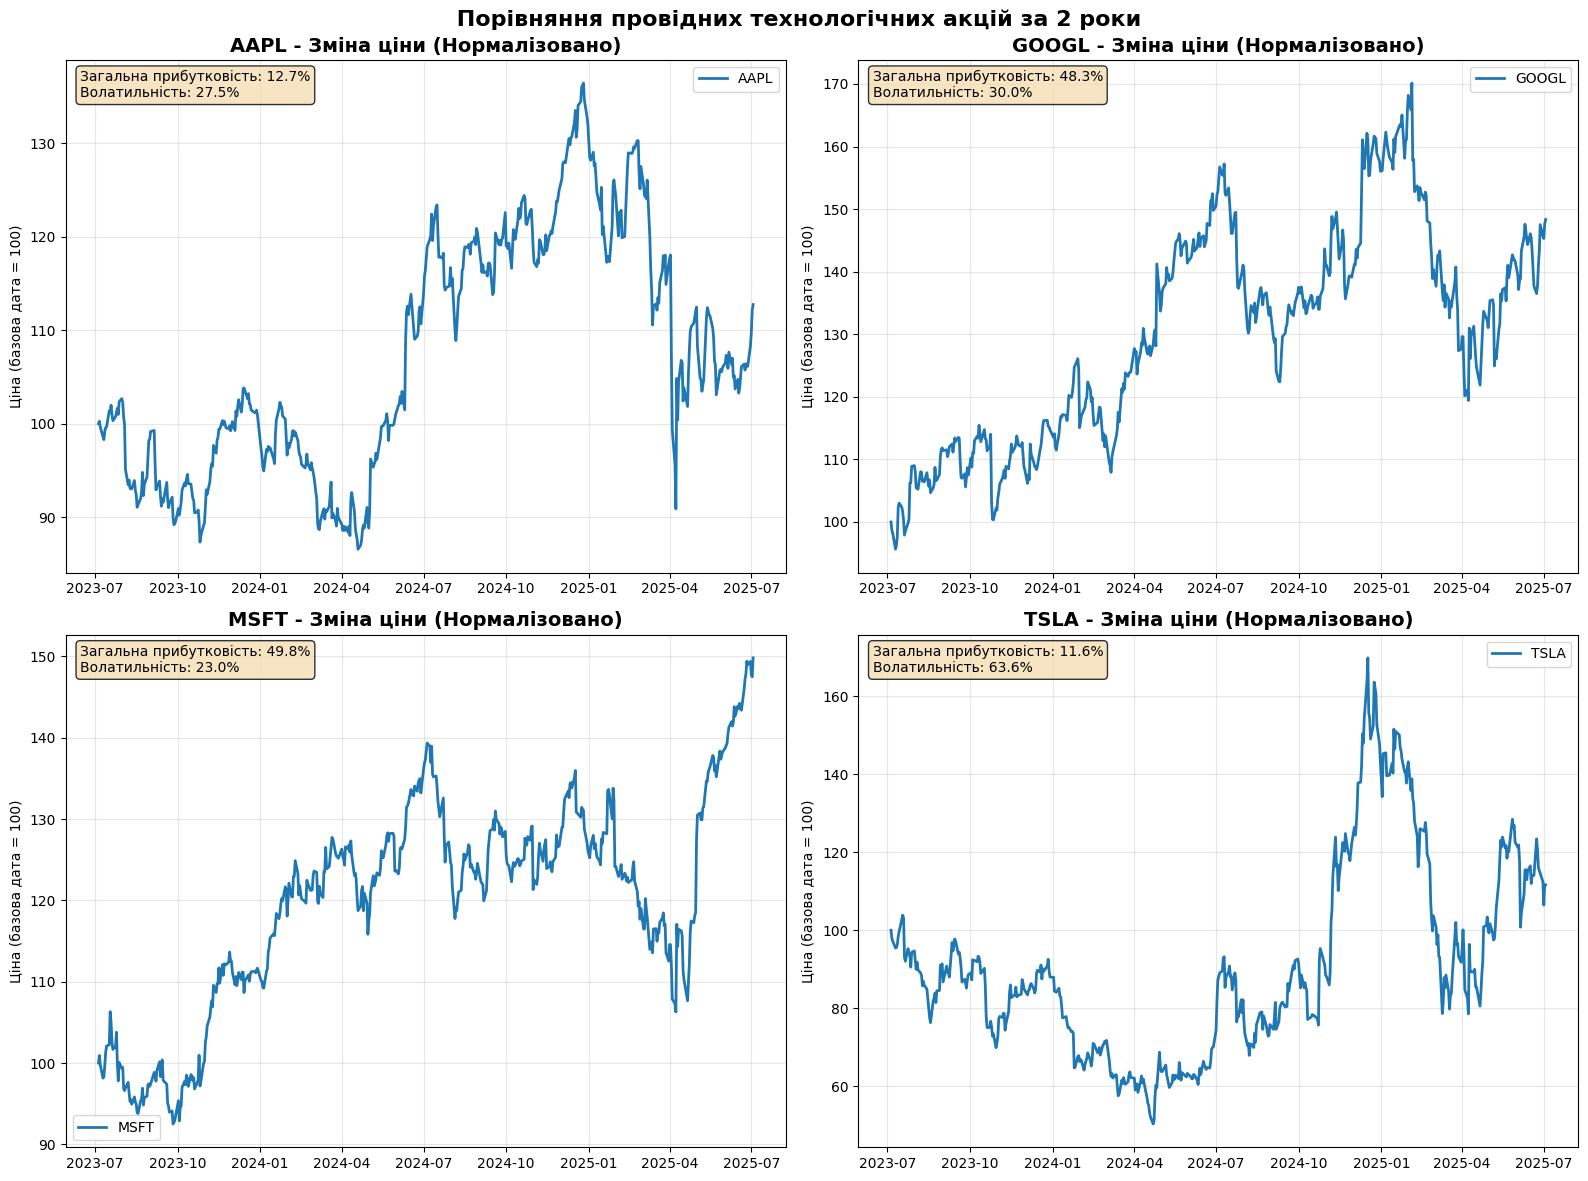

In [21]:
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np

tickers = ['AAPL', 'GOOGL', 'MSFT', 'TSLA']
data_dict = {}

for ticker in tickers:
    stock = yf.Ticker(ticker)
    data_dict[ticker] = stock.history(period="2y")

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

for i, ticker in enumerate(tickers):
    data = data_dict[ticker]
    normalized_price = (data['Close'] / data['Close'].iloc[0]) * 100

    axes[i].plot(data.index, normalized_price, linewidth=2, label=ticker)
    axes[i].set_title(f'{ticker} - Зміна ціни (Нормалізовано)', fontsize=14, fontweight='bold')
    axes[i].set_ylabel('Ціна (базова дата = 100)')
    axes[i].grid(True, alpha=0.3)
    axes[i].legend()

    total_return = float((data['Close'].iloc[-1] / data['Close'].iloc[0] - 1) * 100)
    volatility = float(data['Close'].pct_change().std() * np.sqrt(252) * 100)

    stats_text = f'Загальна прибутковість: {total_return:.1f}%\nВолатильність: {volatility:.1f}%'
    axes[i].text(0.02, 0.98, stats_text,
                 transform=axes[i].transAxes, fontsize=10,
                 verticalalignment='top',
                 bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

plt.suptitle(' Порівняння провідних технологічних акцій за 2 роки', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

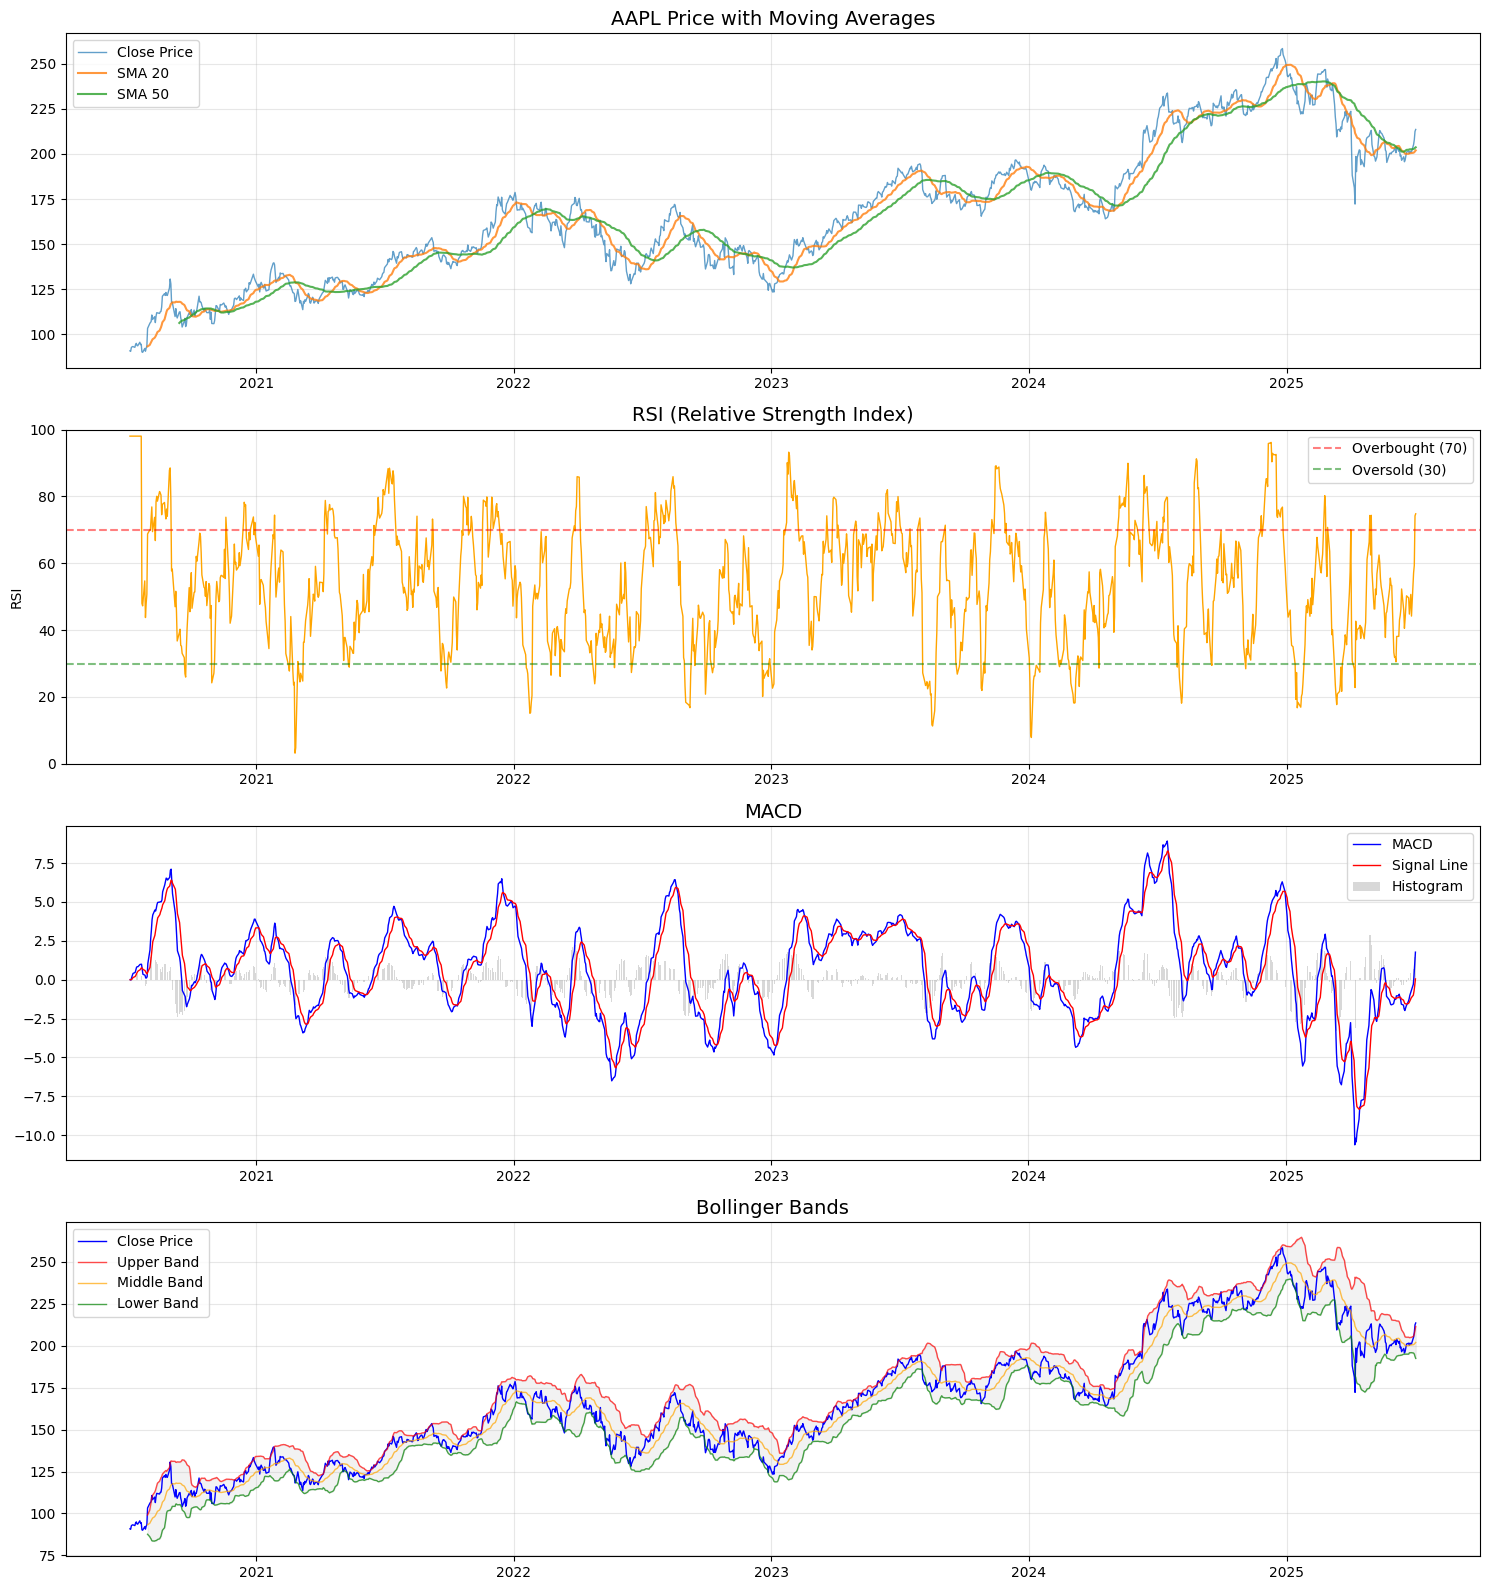

In [22]:
fig, axes = plt.subplots(4, 1, figsize=(15, 16))

axes[0].plot(df_with_indicators.index, df_with_indicators['Close'], label='Close Price', alpha=0.7, linewidth=1)
axes[0].plot(df_with_indicators.index, df_with_indicators['SMA_20'], label='SMA 20', alpha=0.8, linewidth=1.5)
axes[0].plot(df_with_indicators.index, df_with_indicators['SMA_50'], label='SMA 50', alpha=0.8, linewidth=1.5)
axes[0].set_title('AAPL Price with Moving Averages', fontsize=14)
axes[0].legend()
axes[0].grid(True, alpha=0.3)

axes[1].plot(df_with_indicators.index, df_with_indicators['RSI_14'], color='orange', linewidth=1)
axes[1].axhline(y=70, color='r', linestyle='--', alpha=0.5, label='Overbought (70)')
axes[1].axhline(y=30, color='g', linestyle='--', alpha=0.5, label='Oversold (30)')
axes[1].set_title('RSI (Relative Strength Index)', fontsize=14)
axes[1].set_ylabel('RSI')
axes[1].legend()
axes[1].grid(True, alpha=0.3)
axes[1].set_ylim(0, 100)

axes[2].plot(df_with_indicators.index, df_with_indicators['MACD'], label='MACD', color='blue', linewidth=1)
axes[2].plot(df_with_indicators.index, df_with_indicators['MACD_Signal'], label='Signal Line', color='red', linewidth=1)
axes[2].bar(df_with_indicators.index, df_with_indicators['MACD_Histogram'], label='Histogram', alpha=0.3, color='gray')
axes[2].set_title('MACD', fontsize=14)
axes[2].legend()
axes[2].grid(True, alpha=0.3)

axes[3].plot(df_with_indicators.index, df_with_indicators['Close'], label='Close Price', color='blue', linewidth=1)
axes[3].plot(df_with_indicators.index, df_with_indicators['BB_Upper_20'], label='Upper Band', color='red', alpha=0.7, linewidth=1)
axes[3].plot(df_with_indicators.index, df_with_indicators['BB_Middle_20'], label='Middle Band', color='orange', alpha=0.7, linewidth=1)
axes[3].plot(df_with_indicators.index, df_with_indicators['BB_Lower_20'], label='Lower Band', color='green', alpha=0.7, linewidth=1)
axes[3].fill_between(df_with_indicators.index, df_with_indicators['BB_Upper_20'], df_with_indicators['BB_Lower_20'], alpha=0.1, color='gray')
axes[3].set_title('Bollinger Bands', fontsize=14)
axes[3].legend()
axes[3].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [23]:
fig = go.Figure(data=go.Candlestick(x=df.index,
                open=df['Open'],
                high=df['High'],
                low=df['Low'],
                close=df['Close']))

fig.update_layout(
    title='AAPL Candlestick Chart (2019-2024)',
    yaxis_title='Price ($)',
    xaxis_title='Date',
    height=600
)

fig.show()